In [1]:
import pandas as pd
import numpy as np
import pickle
import sys
sys.path.append("..")
from query_representation.utils import *
from cardinality_estimation.featurizer import JOIN_MAP_IMDB
from utils import *
import seaborn as sns
import os
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [31]:
FN = "/Users/pari/prism-testbed/final_results/JOB-light-train/MSCN1542869307/QError.csv"
#JOBDIR = "/Users/pari//db_data/job/all_job/"
CEBDIR = "/Users/pari//db_data/imdb-unique-plans/allqs/"
JOBLIGHTDIR = "/Users/pari/db_data/joblight_train/"
#JOBLIGHT_DIR = "/Users/pari//db_data/joblight_train"
IMDBTRAINDIR = "/Users/pari//db_data/imdb_train_mod"

JOB_SBITMAPDIR = "/Users/pari/db_data/job_bitmaps/sample_bitmap/"
JOB_JBITMAPDIR = "/Users/pari/db_data/job_bitmaps/join_bitmap/"

TIMEOUT_CARD = 150001000000

In [32]:
imdbfns = get_query_fns(IMDBTRAINDIR, template_fraction=1.0)
imdbqreps = load_qdata(imdbfns)

KeyboardInterrupt: 

In [19]:
jobfns = get_query_fns(JOBLIGHTDIR, template_fraction=1.0)
jobqreps = load_qdata(jobfns)

In [20]:
print(len(jobfns), len(imdbfns), len(jobqreps), len(imdbqreps))

43294 44233 43294 44233


In [227]:
from collections import defaultdict

def get_ys(qreps):
    ys = []
    ypgs = []
    ycols = defaultdict(list)
    
    for qrep in qreps:
        sg = qrep["subset_graph"]
        for node, data in sg.nodes(data=True):
            if "actual" not in data["cardinality"]:
                continue
            if "expected" not in data["cardinality"]:
                continue
            if data["cardinality"]["actual"] > TIMEOUT_CARD:
                continue
                
            if data["cardinality"]["actual"] > 0.5e8:
                continue
            if data["cardinality"]["actual"] == 0:
                continue
                
            #if "t" in node:
            
            for alias in node:
                real_name = qrep["join_graph"].nodes()[alias]["real_name"]
                ycols[real_name].append(data["cardinality"]["actual"])
                 
            ys.append(data["cardinality"]["actual"])
            ypgs.append(data["cardinality"]["expected"])
            
    return ys, ypgs, ycols

(1.0, 10000000.0)

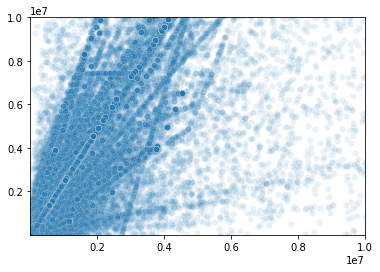

In [228]:
ys, ypgs, ycols = get_ys(jobqreps)
sns.scatterplot(x=ypgs, y = ys, alpha=0.1)
#plt.yscale("log")
plt.ylim([1,1e7])
plt.xlim([1,1e7])

In [229]:
print(np.mean(ys))

4212430.187403586


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


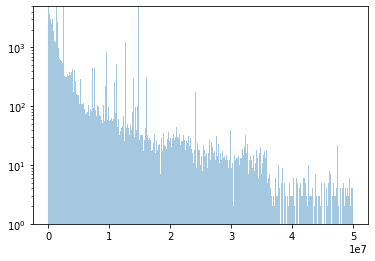

In [230]:
sns.distplot(ys, kde=False, bins=1000)
#plt.xscale("log")
plt.ylim([1, 5000])
plt.yscale("log")

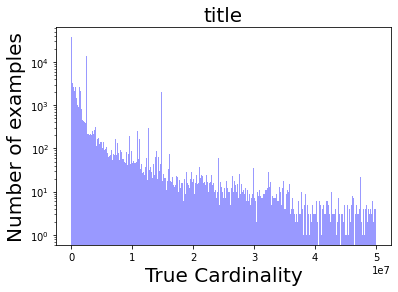

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


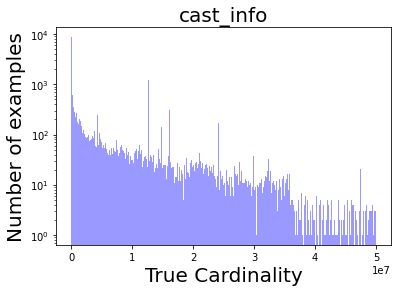

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


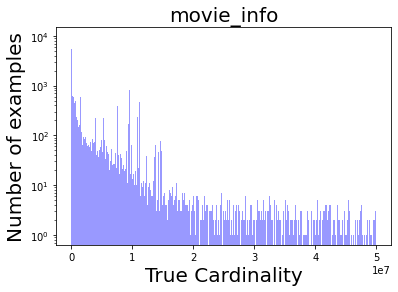

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


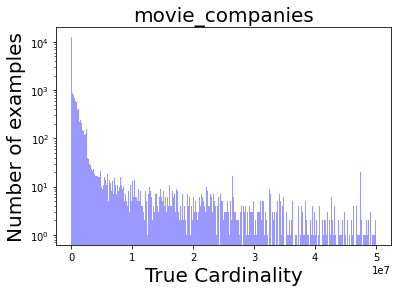

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


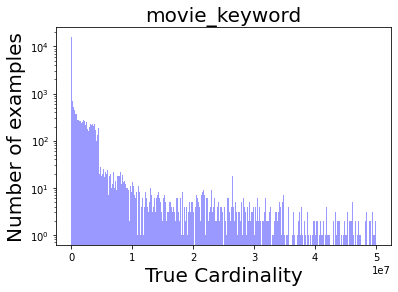

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


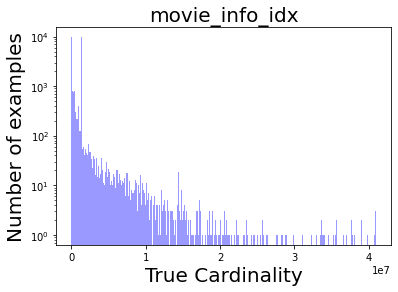

In [231]:
# for k,vals in ycols.items():
#     sns.distplot(vals, kde=False, bins=1000, color="blue")
#     plt.ylim([1, 5000])
#     plt.yscale("log")
#     plt.title(k, fontsize=20)
#     plt.show()
    
for k,vals in ycols.items():
    sns.distplot(vals, kde=False, bins=1000, color="blue")
    #plt.ylim([1, 5000])
    plt.yscale("log")
    plt.title(k, fontsize=20)
    plt.ylabel("Number of examples", fontsize=20)
    plt.xlabel("True Cardinality", fontsize=20)
    
    fn = "{}-cardinality-distribut-joblight.pdf".format(k)
    
    plt.savefig(fn)
    plt.show()

(1.0, 10000000.0)

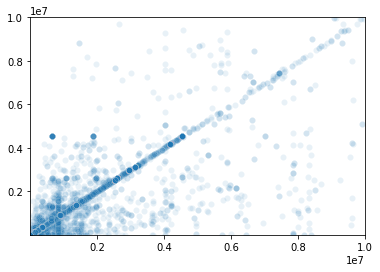

In [232]:
ys, ypgs, ycols = get_ys(imdbqreps)
sns.scatterplot(x=ypgs, y = ys, alpha=0.1)
plt.ylim([1,1e7])
#plt.yscale("log")
plt.xlim([1,1e7])

In [233]:
print(np.mean(ys))

3688782.7559423093


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


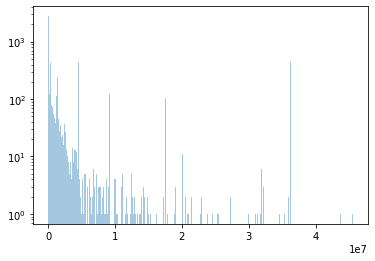

In [234]:
sns.distplot(ys, kde=False, bins=1000)
#plt.ylim([1, 1000])
plt.yscale("log")
#plt.xscale("log")
#plt.xlim([1,100000])

In [221]:
# for k,vals in ycols.items():
#     sns.distplot(vals, kde=False, bins=1000)
#     #plt.ylim([1, 5000])
#     plt.yscale("log")
#     plt.title(k, fontsize=20)

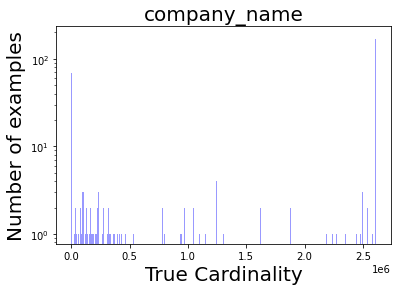

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


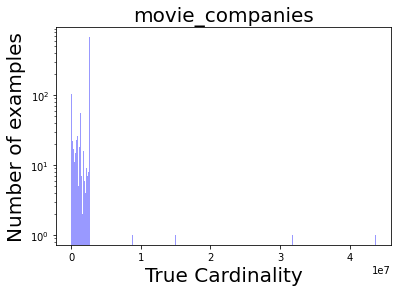

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


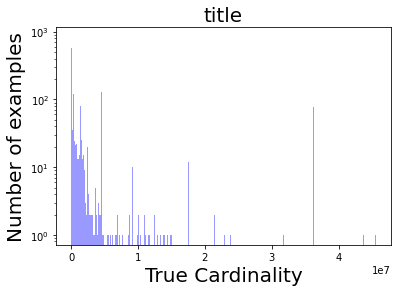

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


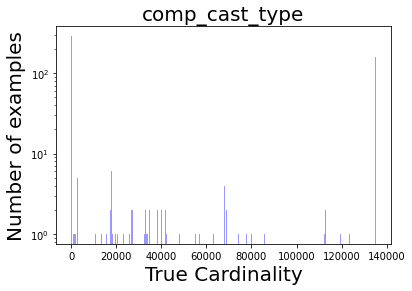

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


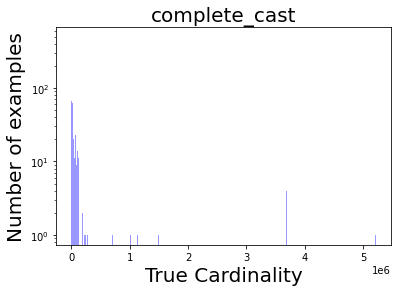

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


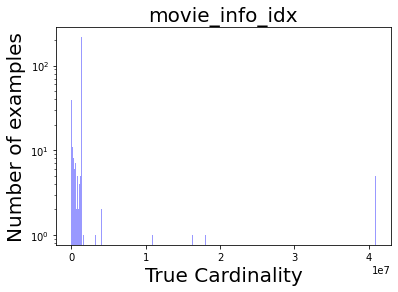

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


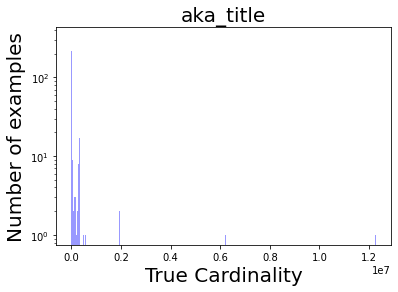

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


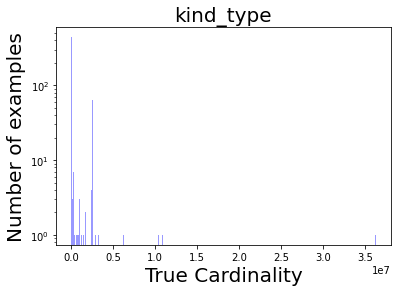

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


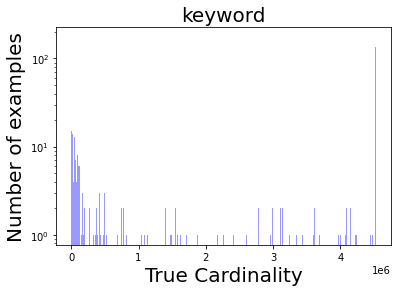

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


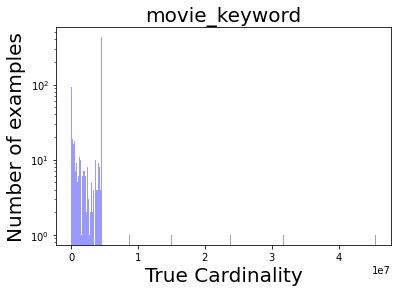

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


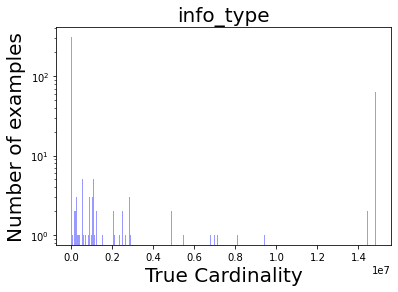

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


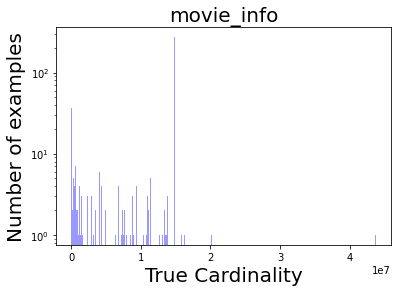

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


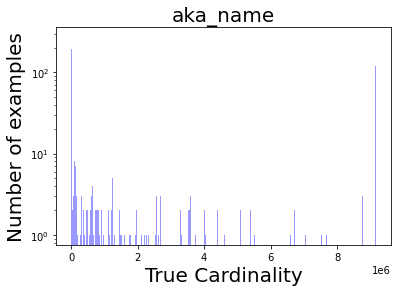

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


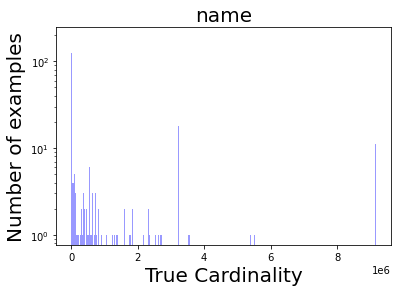

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


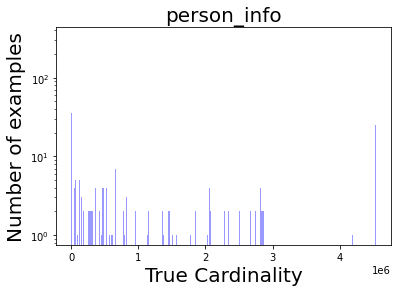

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


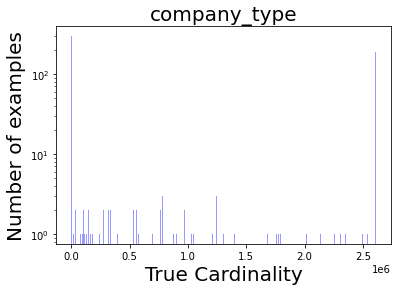

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


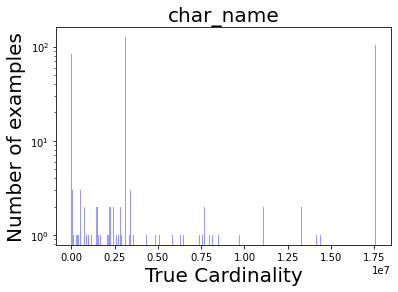

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


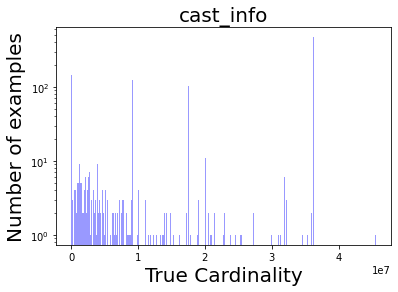

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


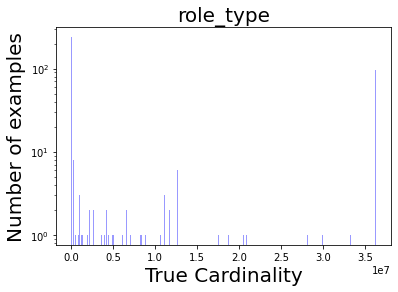

In [235]:
for k,vals in ycols.items():
    sns.distplot(vals, kde=False, bins=1000, color="blue")
    #plt.ylim([1, 5000])
    plt.yscale("log")
    plt.title(k, fontsize=20)
    plt.ylabel("Number of examples", fontsize=20)
    plt.xlabel("True Cardinality", fontsize=20)
    
    fn = "{}-cardinality-distribut-imdb-simple-workload2.pdf".format(k)
    
    plt.savefig(fn)
    plt.show()

In [223]:
print(np.min(ys), np.max(ys), len(ys))

1 45544361 12411


In [ ]:
print(np.max(ys))

In [238]:
seentables = set()
seenpredcols = set()
seenjoincols = set()
seenjoinpreds = set()

for qrep in jobqreps:
    for node, data in qrep["join_graph"].nodes(data=True):
        seentables.add(data["real_name"])
        if "t" in node:
            print(data["predicates"])
        for di, predcol in enumerate(data["pred_cols"]):
#             if "production_year" in predcol:
#                 print(predcol, data["pred_vals"][di])
    
            predcol = predcol.replace(node +".", data["real_name"] + ".")
            if predcol in JOIN_MAP_IMDB:
                seenjoinpreds.add(JOIN_MAP_IMDB[predcol])
            
            seenpredcols.add(predcol)
        
    for e in qrep["join_graph"].edges(data=True):
        jc = e[2]["join_condition"]
        jc = jc.replace(" ", "")
        joins = jc.split("=")
        #joins[0]
        seenjoincols.add(joins[0][joins[0].find(".")+1:])
        seenjoincols.add(joins[1][joins[1].find(".")+1:])
        #seenjoincols.add(joins[1])
        
        

[' t.production_year>2006']
[' t.kind_id=7', ' t.production_year=1956']
[' t.kind_id=7', ' t.production_year>2012']
[' t.kind_id=7']
[' t.kind_id=7', ' t.production_year<2007']
[' t.kind_id<7', ' t.production_year<1981']
[' t.kind_id>2', ' t.production_year=2003']
[' t.kind_id<7', ' t.production_year<1975']
[]
[' t.kind_id=1', ' t.production_year=2010']
[' t.production_year>2010']
[]
[' t.kind_id=2', ' t.production_year<1999']
[' t.production_year<2013']
[]
[]
[' t.production_year<2006']
[]
[]
[]
[]
[]
[' t.kind_id<7', ' t.production_year<1997']
[]
[]
[' t.kind_id>2', ' t.production_year<2012']
[' t.production_year=1924']
[]
[' t.production_year<1988']
[' t.production_year>2003']
[' t.kind_id=7', ' t.production_year=1999']
[' t.production_year=1998']
[' t.production_year<1979']
[' t.kind_id<3']
[' t.kind_id=1']
[' t.production_year=2009']
[' t.kind_id<7']
[]
[' t.kind_id=1', ' t.production_year>2010']
[]
[' t.kind_id=7']
[]
[' t.kind_id=7', ' t.production_year=2011']
[' t.kind_id<7']
[

[]
[' t.production_year>2007']
[]
[]
[' t.production_year>2013']
[]
[' t.kind_id>1', ' t.production_year>2008']
[' t.kind_id=7', ' t.production_year<2008']
[' t.kind_id<7', ' t.production_year=1977']
[' t.production_year=2002']
[' t.kind_id<7', ' t.production_year=2000']
[' t.kind_id>6', ' t.production_year=2007']
[' t.kind_id=1', ' t.production_year<2011']
[' t.production_year<2006']
[]
[' t.kind_id>1', ' t.production_year=2003']
[]
[' t.production_year=2012']
[' t.kind_id>1']
[' t.kind_id=7']
[' t.kind_id<7', ' t.production_year=1956']
[' t.kind_id>1']
[]
[' t.kind_id=7', ' t.production_year=1992']
[]
[' t.production_year>1987']
[]
[' t.kind_id>1']
[' t.production_year=2012']
[]
[' t.kind_id<7', ' t.production_year<1999']
[' t.production_year<2004']
[' t.kind_id<6']
[' t.kind_id>3', ' t.production_year<2009']
[]
[' t.kind_id=7']
[]
[]
[]
[' t.kind_id<7', ' t.production_year>2011']
[' t.kind_id>1']
[]
[' t.kind_id<6']
[' t.kind_id<7', ' t.production_year=1992']
[' t.kind_id>1', ' t.pr

[' t.kind_id<7', ' t.production_year<1974']
[]
[' t.production_year<1975']
[' t.kind_id<7', ' t.production_year>2003']
[' t.kind_id>1']
[' t.kind_id>3', ' t.production_year<2000']
[' t.production_year>1920']
[' t.kind_id=7', ' t.production_year>1997']
[]
[]
[' t.production_year<2007']
[' t.production_year=2007']
[' t.kind_id<7', ' t.production_year<1996']
[' t.kind_id>1', ' t.production_year<1934']
[' t.kind_id>1', ' t.production_year=2009']
[' t.kind_id<7', ' t.production_year>1972']
[' t.kind_id=7', ' t.production_year=2007']
[' t.production_year>1978']
[' t.kind_id=7', ' t.production_year>1999']
[]
[]
[' t.kind_id<3', ' t.production_year>1970']
[' t.production_year>1979']
[' t.kind_id<7', ' t.production_year<2009']
[' t.kind_id=7', ' t.production_year>2001']
[' t.kind_id<7']
[' t.kind_id=7', ' t.production_year=2007']
[]
[' t.kind_id>1', ' t.production_year=1985']
[]
[' t.kind_id=1', ' t.production_year>2005']
[]
[' t.kind_id>1']
[' t.kind_id=1']
[' t.kind_id=7']
[' t.production_yea

[' t.production_year>0']
[' t.kind_id=3', ' t.production_year>1908']
[' t.production_year<1951']
[' t.kind_id=3', ' t.production_year>1996']
[' t.kind_id=7', ' t.production_year<1987']
[' t.kind_id<7', ' t.production_year=1994']
[' t.production_year<2007']
[]
[' t.production_year=1995']
[' t.production_year>2011']
[' t.kind_id<7', ' t.production_year<2006']
[' t.kind_id=7', ' t.production_year>1996']
[' t.kind_id=7', ' t.production_year>1985']
[' t.kind_id<7', ' t.production_year<2007']
[' t.kind_id>4']
[]
[' t.kind_id=7', ' t.production_year<2009']
[' t.kind_id>1', ' t.production_year>2010']
[' t.kind_id>4']
[]
[' t.kind_id<7', ' t.production_year=1997']
[]
[' t.production_year<1981']
[]
[' t.production_year<1905']
[' t.kind_id<7', ' t.production_year<1923']
[]
[' t.kind_id=1']
[' t.production_year>1958']
[]
[' t.kind_id<7']
[]
[' t.kind_id<7']
[]
[]
[]
[]
[' t.production_year>2010']
[' t.kind_id<2', ' t.production_year=1980']
[]
[' t.production_year=2012']
[]
[]
[' t.production_year>

[]
[' t.kind_id>1']
[' t.kind_id=7']
[]
[' t.production_year<2012']
[' t.kind_id=7', ' t.production_year=1970']
[' t.kind_id<7', ' t.production_year<2003']
[]
[' t.kind_id=7', ' t.production_year>1995']
[]
[' t.kind_id<7']
[' t.production_year<2005']
[' t.production_year=2013']
[' t.kind_id=7', ' t.production_year<2004']
[' t.kind_id<3', ' t.production_year<2011']
[]
[' t.kind_id>1']
[' t.kind_id<7', ' t.production_year<2008']
[]
[' t.production_year<2005']
[' t.kind_id>2']
[' t.kind_id<7', ' t.production_year>1958']
[]
[]
[' t.production_year=2013']
[' t.kind_id<7', ' t.production_year=2004']
[]
[]
[' t.kind_id>2', ' t.production_year>2010']
[' t.kind_id<2', ' t.production_year>1981']
[' t.production_year<1937']
[]
[' t.kind_id<7', ' t.production_year<2000']
[]
[' t.kind_id<7']
[' t.production_year<2012']
[' t.production_year=1999']
[' t.production_year=2007']
[]
[' t.kind_id<7', ' t.production_year>2009']
[]
[' t.kind_id>1', ' t.production_year<2012']
[' t.kind_id=1', ' t.production_

[' t.kind_id=7', ' t.production_year>2010']
[]
[]
[' t.production_year>2009']
[]
[]
[' t.production_year>1980']
[]
[' t.kind_id<7']
[' t.production_year>2006']
[' t.production_year=1963']
[' t.production_year=2006']
[' t.kind_id>1', ' t.production_year>1999']
[' t.kind_id>1']
[' t.kind_id<2', ' t.production_year=2012']
[' t.production_year=2006']
[' t.kind_id<7', ' t.production_year>2012']
[' t.production_year<2011']
[' t.kind_id>1', ' t.production_year<2008']
[' t.production_year=2007']
[' t.kind_id>1']
[' t.kind_id=3', ' t.production_year<2008']
[]
[' t.kind_id<7', ' t.production_year<1958']
[' t.kind_id<7']
[]
[' t.kind_id<7', ' t.production_year<2007']
[]
[]
[]
[' t.kind_id<7']
[' t.production_year>1989']
[' t.kind_id<7', ' t.production_year<2011']
[' t.kind_id<4']
[]
[' t.kind_id<7', ' t.production_year<2002']
[' t.kind_id=7', ' t.production_year>2001']
[]
[]
[' t.production_year>2001']
[]
[' t.kind_id=7']
[' t.kind_id=1', ' t.production_year=2011']
[' t.production_year>2013']
[]


[' t.kind_id<7']
[]
[]
[' t.production_year<1998']
[]
[' t.production_year>1910']
[]
[' t.kind_id=7', ' t.production_year<1998']
[]
[' t.production_year>2004']
[' t.kind_id=7']
[]
[' t.kind_id>1']
[]
[' t.kind_id<7']
[' t.kind_id>6', ' t.production_year>2001']
[' t.production_year>2012']
[' t.production_year>2011']
[' t.kind_id<7', ' t.production_year=2010']
[' t.production_year>2009']
[' t.kind_id<7', ' t.production_year<2002']
[' t.kind_id=1', ' t.production_year<1972']
[' t.kind_id=7']
[' t.production_year=2001']
[]
[' t.kind_id>1', ' t.production_year<1989']
[' t.kind_id=7']
[' t.production_year<2004']
[' t.kind_id=7', ' t.production_year=2004']
[' t.kind_id=7', ' t.production_year=2009']
[' t.kind_id=7', ' t.production_year<2006']
[' t.kind_id=7', ' t.production_year<1960']
[]
[]
[' t.kind_id<7', ' t.production_year<2011']
[]
[' t.kind_id=1', ' t.production_year=1957']
[]
[' t.production_year=2009']
[' t.production_year=2005']
[' t.production_year>2012']
[' t.production_year=2008'

[]
[]
[]
[' t.production_year<2004']
[]
[]
[' t.production_year>1979']
[' t.production_year<2012']
[' t.kind_id>1', ' t.production_year=2012']
[' t.production_year<2005']
[]
[' t.production_year>2000']
[' t.kind_id=7']
[]
[]
[' t.production_year<2009']
[' t.kind_id=7', ' t.production_year>1990']
[' t.kind_id<2', ' t.production_year>2008']
[]
[' t.kind_id=7', ' t.production_year>2006']
[' t.production_year<1997']
[' t.kind_id<7']
[]
[]
[' t.kind_id=7']
[' t.kind_id<3', ' t.production_year<1994']
[' t.kind_id<3']
[' t.kind_id<7']
[' t.kind_id>1']
[]
[]
[]
[' t.production_year=2009']
[' t.kind_id<6', ' t.production_year=2005']
[]
[' t.kind_id>4', ' t.production_year<2001']
[' t.kind_id<7', ' t.production_year=2007']
[' t.kind_id<7', ' t.production_year>1971']
[' t.production_year=1948']
[' t.kind_id=7', ' t.production_year<2012']
[' t.kind_id>1', ' t.production_year>2004']
[' t.production_year<1997']
[' t.kind_id<7', ' t.production_year<1992']
[]
[' t.kind_id=7', ' t.production_year<1958'

[' t.kind_id=7', ' t.production_year>1999']
[' t.production_year<1974']
[]
[' t.production_year<2009']
[' t.kind_id<7', ' t.production_year>2002']
[' t.kind_id<3']
[' t.kind_id<7']
[]
[' t.kind_id=7', ' t.production_year=1980']
[]
[]
[' t.kind_id<7', ' t.production_year=2006']
[' t.kind_id=1', ' t.production_year=1972']
[' t.production_year=1938']
[' t.kind_id<3']
[' t.production_year>2009']
[]
[]
[' t.kind_id<7']
[' t.kind_id=4']
[]
[' t.kind_id=7', ' t.production_year=2003']
[' t.production_year<1979']
[' t.kind_id>2', ' t.production_year<2011']
[' t.production_year<2012']
[' t.kind_id=1', ' t.production_year<1958']
[]
[' t.kind_id<7', ' t.production_year=2006']
[]
[]
[' t.kind_id=1', ' t.production_year=2008']
[]
[' t.production_year=1987']
[' t.kind_id<7', ' t.production_year>2003']
[]
[]
[' t.kind_id=1', ' t.production_year>2009']
[' t.kind_id<2', ' t.production_year=1969']
[]
[' t.kind_id=1']
[' t.kind_id<7', ' t.production_year<1998']
[]
[' t.kind_id=4']
[' t.kind_id>2', ' t.pro

[]
[' t.kind_id=7', ' t.production_year>2011']
[' t.production_year<2003']
[]
[' t.kind_id=3']
[' t.kind_id=7', ' t.production_year=2000']
[' t.kind_id=7', ' t.production_year<1990']
[' t.production_year=1996']
[]
[' t.production_year=2003']
[]
[]
[' t.kind_id=7', ' t.production_year<2001']
[' t.production_year<1931']
[' t.production_year=2002']
[' t.production_year>1995']
[' t.kind_id<7', ' t.production_year>1974']
[' t.production_year<2002']
[' t.production_year>2007']
[]
[]
[]
[]
[' t.kind_id<2']
[' t.production_year>2006']
[' t.kind_id<7', ' t.production_year=2008']
[' t.production_year<2003']
[]
[]
[]
[]
[' t.kind_id=3']
[' t.production_year=2007']
[' t.kind_id<7', ' t.production_year=2008']
[]
[' t.kind_id=7']
[]
[' t.kind_id>2', ' t.production_year<1998']
[' t.kind_id<7']
[' t.production_year<2013']
[' t.kind_id<3', ' t.production_year>2002']
[' t.production_year>1992']
[' t.production_year=1982']
[' t.kind_id<7']
[]
[' t.kind_id>1', ' t.production_year>2009']
[' t.kind_id=2']
[

[' t.kind_id=7', ' t.production_year<1971']
[' t.kind_id<7', ' t.production_year<1988']
[' t.production_year=1962']
[' t.kind_id=7']
[]
[' t.kind_id=7', ' t.production_year=1981']
[' t.kind_id<7', ' t.production_year=1974']
[' t.production_year>2000']
[' t.kind_id>4']
[]
[' t.kind_id<4', ' t.production_year<2012']
[]
[' t.production_year>2007']
[' t.kind_id>1']
[' t.production_year<1911']
[' t.kind_id<7']
[' t.production_year>1954']
[' t.production_year=1995']
[]
[' t.kind_id<7']
[' t.production_year>2012']
[' t.production_year=1995']
[' t.production_year>1993']
[' t.kind_id<7', ' t.production_year<2004']
[]
[' t.kind_id>1', ' t.production_year>1955']
[' t.kind_id<7', ' t.production_year>2011']
[]
[]
[' t.kind_id<4', ' t.production_year=2004']
[' t.kind_id=1', ' t.production_year>2009']
[]
[]
[' t.kind_id<7', ' t.production_year=1993']
[' t.kind_id=4']
[' t.kind_id=7', ' t.production_year<1963']
[' t.kind_id>1']
[' t.kind_id=7', ' t.production_year=1970']
[' t.kind_id=7', ' t.productio

[]
[' t.production_year>1945']
[]
[]
[' t.kind_id<4', ' t.production_year<2003']
[' t.production_year<2000']
[' t.kind_id<7', ' t.production_year>1984']
[' t.production_year<1942']
[' t.kind_id=2', ' t.production_year>1900']
[' t.kind_id<7']
[' t.kind_id=3']
[' t.production_year<1985']
[' t.kind_id=1']
[' t.kind_id<7']
[' t.kind_id<3', ' t.production_year=2009']
[' t.kind_id=7', ' t.production_year<2010']
[' t.kind_id=7', ' t.production_year=2001']
[' t.kind_id=7', ' t.production_year<2011']
[]
[' t.kind_id=1', ' t.production_year=1989']
[' t.kind_id<7', ' t.production_year<2009']
[]
[' t.production_year>2000']
[' t.kind_id=1']
[]
[' t.production_year=1994']
[]
[' t.kind_id<7', ' t.production_year<2008']
[' t.production_year=2007']
[]
[' t.kind_id=7', ' t.production_year=2008']
[' t.kind_id=1', ' t.production_year=2004']
[' t.kind_id=1', ' t.production_year<2009']
[' t.kind_id=1', ' t.production_year=1904']
[]
[' t.production_year<1987']
[]
[' t.kind_id=4', ' t.production_year>1998']
[

[' t.production_year<2012']
[' t.kind_id<7', ' t.production_year<1964']
[' t.kind_id=7', ' t.production_year>2011']
[' t.production_year>0']
[]
[' t.kind_id=3']
[' t.kind_id=1']
[' t.production_year>1914']
[]
[]
[' t.kind_id=1', ' t.production_year>2003']
[]
[' t.production_year>2008']
[]
[]
[]
[' t.kind_id<7']
[]
[' t.kind_id<7', ' t.production_year>2001']
[]
[' t.kind_id<7', ' t.production_year>1922']
[' t.production_year>2012']
[' t.kind_id=7', ' t.production_year>1953']
[' t.kind_id<7', ' t.production_year=2011']
[' t.kind_id=7', ' t.production_year=2013']
[' t.kind_id=1', ' t.production_year>2007']
[]
[' t.kind_id<7', ' t.production_year=1995']
[' t.production_year=2000']
[' t.kind_id<7', ' t.production_year>1973']
[' t.kind_id>2']
[' t.production_year>2010']
[' t.production_year>1977']
[]
[]
[' t.kind_id=7']
[' t.kind_id=7', ' t.production_year<2009']
[' t.production_year<1960']
[]
[' t.production_year>2008']
[' t.kind_id=7', ' t.production_year>2006']
[' t.kind_id<3', ' t.produc

[' t.production_year>2008']
[]
[' t.kind_id<7', ' t.production_year=2002']
[' t.kind_id<7']
[' t.kind_id<7']
[' t.kind_id<7']
[' t.production_year<2013']
[' t.production_year>2005']
[]
[' t.kind_id=7', ' t.production_year<2001']
[]
[]
[' t.kind_id<7', ' t.production_year=2001']
[' t.production_year=1966']
[' t.production_year>1994']
[' t.kind_id=7', ' t.production_year>1956']
[' t.kind_id=7', ' t.production_year=2002']
[' t.kind_id=1', ' t.production_year>2002']
[' t.kind_id=1', ' t.production_year>2011']
[]
[' t.kind_id=1']
[' t.production_year<2010']
[]
[' t.kind_id=2', ' t.production_year<2008']
[' t.kind_id=7']
[]
[' t.production_year>1915']
[' t.kind_id>1', ' t.production_year>2002']
[' t.kind_id<7', ' t.production_year=2010']
[' t.production_year=2001']
[]
[' t.production_year=1971']
[' t.kind_id<7', ' t.production_year>1960']
[' t.kind_id=7', ' t.production_year<2012']
[' t.kind_id=6', ' t.production_year>1996']
[' t.kind_id<2', ' t.production_year<1999']
[' t.kind_id=7', ' t.pr

[' t.production_year>1988']
[' t.production_year>1994']
[]
[]
[' t.production_year>2011']
[]
[]
[]
[]
[' t.kind_id<7', ' t.production_year>1973']
[]
[' t.production_year=1984']
[' t.production_year=2010']
[]
[' t.production_year>2009']
[]
[]
[' t.production_year<1916']
[' t.kind_id<7']
[' t.kind_id>1']
[]
[' t.production_year>1961']
[]
[' t.production_year>2011']
[' t.production_year=1972']
[' t.kind_id=7', ' t.production_year<2013']
[]
[' t.kind_id=7', ' t.production_year<2012']
[' t.kind_id>1', ' t.production_year=1978']
[' t.kind_id>1', ' t.production_year>1990']
[]
[' t.kind_id<2', ' t.production_year<1990']
[' t.production_year=1961']
[]
[' t.production_year>2009']
[]
[]
[' t.kind_id<7', ' t.production_year=1980']
[]
[]
[]
[]
[' t.kind_id=7', ' t.production_year=1995']
[' t.kind_id=1', ' t.production_year=1915']
[]
[' t.production_year=2007']
[' t.production_year>2005']
[]
[]
[' t.kind_id=7', ' t.production_year>1997']
[' t.kind_id=1', ' t.production_year=2012']
[' t.kind_id=7']
[

[' t.kind_id=7', ' t.production_year=2003']
[' t.production_year=2008']
[' t.kind_id<7']
[' t.kind_id>2', ' t.production_year<1952']
[]
[' t.production_year>1989']
[]
[' t.kind_id<6', ' t.production_year<1982']
[' t.kind_id=1']
[' t.kind_id<2', ' t.production_year=1995']
[]
[]
[' t.kind_id=1', ' t.production_year>2011']
[]
[' t.kind_id=7', ' t.production_year<1996']
[' t.kind_id=7']
[]
[' t.kind_id=7']
[' t.production_year=2005']
[' t.kind_id<7']
[' t.kind_id<7']
[' t.kind_id=7', ' t.production_year<2011']
[]
[' t.kind_id=1']
[]
[]
[' t.production_year>2013']
[' t.kind_id<7', ' t.production_year<2003']
[' t.kind_id<7']
[]
[' t.kind_id=7', ' t.production_year<1967']
[' t.kind_id<7']
[' t.kind_id<7']
[' t.kind_id=4', ' t.production_year=2010']
[]
[]
[' t.kind_id>1', ' t.production_year=2005']
[' t.kind_id=1', ' t.production_year<2009']
[' t.kind_id>2', ' t.production_year<2004']
[]
[]
[' t.kind_id<3', ' t.production_year<2009']
[' t.kind_id=7', ' t.production_year>2009']
[' t.kind_id=1',

[' t.kind_id=7', ' t.production_year<2007']
[]
[]
[]
[' t.kind_id=4', ' t.production_year<2012']
[' t.kind_id>4']
[' t.production_year>1996']
[]
[]
[' t.kind_id=7', ' t.production_year<1985']
[]
[' t.production_year=2006']
[]
[' t.production_year=1991']
[' t.production_year>1925']
[' t.production_year>2007']
[' t.kind_id<7']
[]
[]
[' t.kind_id=7', ' t.production_year>1996']
[]
[' t.production_year>2009']
[]
[' t.kind_id=7', ' t.production_year>2011']
[' t.kind_id<7', ' t.production_year=2003']
[' t.kind_id<7', ' t.production_year<2008']
[]
[]
[' t.production_year>1985']
[' t.kind_id>1', ' t.production_year>2011']
[' t.kind_id<7', ' t.production_year<2011']
[' t.kind_id=1', ' t.production_year>2010']
[' t.kind_id=7', ' t.production_year=2008']
[]
[' t.kind_id=7']
[' t.production_year>2012']
[' t.production_year>2013']
[' t.production_year>1968']
[' t.kind_id<7', ' t.production_year<1999']
[' t.production_year=2013']
[' t.kind_id<7', ' t.production_year>1896']
[' t.kind_id=4', ' t.produc

[]
[]
[' t.kind_id=1', ' t.production_year<1925']
[' t.production_year<1922']
[' t.production_year>1987']
[' t.production_year<2007']
[' t.kind_id<7', ' t.production_year=1961']
[' t.production_year<1997']
[' t.kind_id=1']
[' t.production_year<2005']
[' t.production_year=1988']
[' t.kind_id<7']
[' t.kind_id<7']
[' t.kind_id=7']
[' t.kind_id>4', ' t.production_year=2010']
[]
[' t.kind_id=1']
[' t.kind_id>1', ' t.production_year>0']
[]
[' t.production_year=2007']
[]
[]
[' t.production_year>1973']
[' t.kind_id=7', ' t.production_year<2013']
[' t.production_year=1964']
[' t.production_year=1993']
[]
[' t.kind_id=1', ' t.production_year<2013']
[]
[' t.kind_id=1', ' t.production_year>2008']
[' t.kind_id<7']
[' t.kind_id=4', ' t.production_year<2012']
[' t.production_year>2004']
[' t.production_year=2003']
[' t.production_year=2012']
[' t.production_year>2000']
[' t.kind_id=7', ' t.production_year<2001']
[' t.kind_id=7', ' t.production_year<2009']
[' t.production_year<2004']
[' t.kind_id<4']


[' t.production_year>1965']
[' t.kind_id=1', ' t.production_year=2010']
[' t.kind_id<7', ' t.production_year=1993']
[]
[' t.kind_id<7', ' t.production_year>2005']
[' t.kind_id=7', ' t.production_year>2006']
[' t.kind_id=7', ' t.production_year>1974']
[]
[' t.kind_id<7', ' t.production_year>1912']
[]
[]
[]
[]
[]
[' t.kind_id<7']
[' t.production_year<1982']
[]
[' t.kind_id<7', ' t.production_year>1989']
[' t.production_year<1922']
[' t.production_year<2007']
[' t.production_year=2009']
[]
[' t.production_year<2010']
[]
[' t.production_year=2010']
[' t.kind_id<7', ' t.production_year<2011']
[' t.production_year>2009']
[' t.production_year>1979']
[' t.production_year>2001']
[' t.kind_id=7']
[]
[' t.production_year=2009']
[]
[' t.kind_id=7', ' t.production_year<2010']
[' t.kind_id<7', ' t.production_year<2006']
[' t.production_year>1997']
[]
[' t.kind_id=7', ' t.production_year<2009']
[' t.kind_id=3']
[' t.production_year>1920']
[' t.production_year=2004']
[' t.kind_id<7', ' t.production_ye

[]
[' t.kind_id=4']
[' t.kind_id=7', ' t.production_year>2007']
[]
[' t.production_year=2010']
[' t.kind_id<7', ' t.production_year=1986']
[]
[' t.kind_id>1', ' t.production_year=2004']
[' t.production_year>2006']
[' t.kind_id=7', ' t.production_year<2008']
[' t.production_year<1934']
[' t.kind_id<7', ' t.production_year>1975']
[' t.kind_id<7', ' t.production_year<2005']
[' t.production_year>2009']
[]
[' t.kind_id<2', ' t.production_year>2012']
[]
[' t.kind_id=7', ' t.production_year>1970']
[' t.kind_id=7', ' t.production_year=2010']
[]
[' t.production_year<1997']
[' t.kind_id<7']
[]
[]
[' t.kind_id<6', ' t.production_year>1903']
[]
[]
[' t.production_year=2013']
[]
[]
[]
[' t.production_year=2008']
[' t.kind_id=1', ' t.production_year=1902']
[' t.production_year<2011']
[' t.kind_id=1', ' t.production_year>1996']
[]
[' t.kind_id=7', ' t.production_year<1994']
[' t.production_year<1969']
[' t.production_year>1976']
[' t.production_year>2010']
[]
[' t.production_year=1994']
[' t.kind_id=

[]
[' t.kind_id=7', ' t.production_year>1998']
[]
[]
[' t.production_year=1985']
[' t.kind_id=7']
[' t.kind_id>1', ' t.production_year=2011']
[' t.kind_id<4', ' t.production_year>1965']
[]
[]
[' t.kind_id=7', ' t.production_year<1955']
[]
[' t.kind_id=1', ' t.production_year<2012']
[]
[' t.kind_id<4', ' t.production_year<2012']
[' t.kind_id=1']
[' t.kind_id=7', ' t.production_year=1995']
[' t.kind_id<7', ' t.production_year<2012']
[' t.production_year=1961']
[' t.kind_id=7']
[' t.kind_id<7', ' t.production_year<2012']
[' t.production_year<2008']
[' t.kind_id<6', ' t.production_year=2003']
[]
[' t.kind_id=1']
[' t.kind_id<7', ' t.production_year<2010']
[' t.kind_id=2', ' t.production_year<1985']
[]
[' t.kind_id>1']
[]
[' t.production_year>1924']
[' t.kind_id<7', ' t.production_year<1928']
[' t.kind_id<2', ' t.production_year>1983']
[' t.production_year=2003']
[' t.kind_id=1', ' t.production_year=2007']
[' t.production_year>1964']
[' t.kind_id<7', ' t.production_year>1976']
[]
[' t.kind_

[]
[' t.production_year>2005']
[' t.kind_id=7']
[]
[]
[' t.kind_id<7', ' t.production_year>2004']
[' t.kind_id<7', ' t.production_year=1997']
[' t.production_year>1969']
[' t.kind_id=7']
[]
[]
[' t.production_year<2002']
[' t.kind_id>3']
[]
[]
[' t.production_year=1976']
[' t.kind_id>2', ' t.production_year>2003']
[' t.kind_id=7', ' t.production_year=1973']
[' t.production_year<1999']
[' t.production_year<1970']
[' t.kind_id<7', ' t.production_year=2005']
[' t.production_year<2009']
[' t.kind_id=7', ' t.production_year>1994']
[' t.production_year=2004']
[]
[]
[' t.kind_id>1']
[' t.kind_id<7']
[]
[' t.kind_id<7', ' t.production_year=2007']
[' t.production_year<2004']
[' t.production_year>1991']
[' t.production_year=2007']
[' t.kind_id=7', ' t.production_year=1968']
[]
[]
[' t.kind_id<7', ' t.production_year>2011']
[' t.production_year>2005']
[]
[' t.production_year>2009']
[]
[' t.production_year=2003']
[' t.kind_id=7', ' t.production_year=1996']
[' t.production_year=2008']
[]
[' t.kind_

[' t.production_year<1963']
[]
[' t.production_year>2008']
[]
[' t.production_year<2004']
[' t.kind_id>4', ' t.production_year=2006']
[' t.kind_id<7', ' t.production_year<2003']
[' t.kind_id>1', ' t.production_year<1994']
[' t.kind_id>2', ' t.production_year<1965']
[' t.production_year>1978']
[]
[' t.kind_id=7', ' t.production_year<2012']
[' t.kind_id=1']
[' t.kind_id<7']
[' t.kind_id=7']
[' t.production_year=2005']
[]
[]
[' t.kind_id<7', ' t.production_year=1999']
[' t.kind_id=1', ' t.production_year<2004']
[' t.production_year<1960']
[' t.kind_id<7', ' t.production_year<1981']
[' t.kind_id=1']
[' t.kind_id=1', ' t.production_year=2000']
[' t.kind_id<7', ' t.production_year<1979']
[' t.kind_id<7']
[' t.kind_id=7', ' t.production_year>2006']
[' t.kind_id<7', ' t.production_year>2010']
[]
[' t.production_year=2004']
[' t.production_year<1998']
[' t.kind_id<7', ' t.production_year>2011']
[' t.production_year<1957']
[' t.kind_id<7', ' t.production_year>1984']
[' t.kind_id=7']
[' t.kind_id

[' t.kind_id<7']
[' t.kind_id<7', ' t.production_year>1987']
[' t.kind_id=7', ' t.production_year<2007']
[' t.kind_id<7', ' t.production_year=2002']
[' t.kind_id<7', ' t.production_year>2011']
[]
[' t.kind_id=7', ' t.production_year=2010']
[]
[]
[' t.production_year=1980']
[' t.kind_id=1']
[]
[' t.production_year>1997']
[]
[' t.kind_id<7']
[' t.kind_id=7', ' t.production_year>1997']
[' t.production_year>2012']
[]
[' t.kind_id<7', ' t.production_year<2012']
[' t.production_year<1977']
[' t.kind_id=7']
[' t.production_year=1913']
[' t.production_year<2007']
[' t.production_year>2008']
[' t.production_year>1948']
[]
[' t.kind_id<2', ' t.production_year<1936']
[' t.kind_id<7', ' t.production_year>0']
[]
[' t.kind_id<7', ' t.production_year<1962']
[' t.kind_id<7', ' t.production_year<1995']
[' t.kind_id=4']
[]
[' t.kind_id=1', ' t.production_year=1978']
[' t.production_year>2005']
[' t.production_year<1950']
[' t.kind_id<7']
[' t.kind_id<2', ' t.production_year<2002']
[]
[' t.kind_id<3', ' 

[' t.kind_id=7']
[]
[]
[' t.production_year=1998']
[' t.kind_id<7', ' t.production_year<2012']
[]
[]
[' t.kind_id<4']
[' t.kind_id=2']
[' t.kind_id<7']
[' t.kind_id<7', ' t.production_year<1914']
[' t.kind_id>1', ' t.production_year=2000']
[]
[' t.production_year>2011']
[' t.kind_id<7', ' t.production_year<1916']
[]
[' t.production_year>2011']
[' t.kind_id=7', ' t.production_year=2005']
[' t.kind_id=7']
[' t.kind_id=7', ' t.production_year>2011']
[]
[' t.production_year<1975']
[' t.kind_id>3', ' t.production_year<2006']
[' t.kind_id=4', ' t.production_year<2011']
[]
[]
[' t.production_year<1992']
[' t.kind_id<7', ' t.production_year<2012']
[' t.kind_id<3']
[]
[' t.production_year<1999']
[' t.kind_id=7']
[' t.production_year>1995']
[' t.production_year<2002']
[' t.production_year=2000']
[]
[' t.kind_id<7', ' t.production_year=1921']
[' t.kind_id<7']
[' t.kind_id>2', ' t.production_year=2006']
[' t.kind_id=4', ' t.production_year>1999']
[' t.kind_id=7', ' t.production_year>2002']
[]
[' t

[' t.production_year>2004']
[]
[]
[]
[]
[' t.kind_id>1', ' t.production_year=2003']
[' t.kind_id=1']
[' t.production_year>1958']
[' t.kind_id>4', ' t.production_year<1999']
[' t.kind_id<7', ' t.production_year=2004']
[]
[]
[]
[' t.kind_id=7', ' t.production_year=2011']
[]
[' t.kind_id<7', ' t.production_year>1959']
[' t.kind_id<7', ' t.production_year<2009']
[' t.kind_id>4', ' t.production_year<2010']
[' t.kind_id=1']
[]
[' t.production_year=2001']
[]
[' t.production_year<2009']
[' t.kind_id>1', ' t.production_year>2010']
[' t.kind_id>2', ' t.production_year<1990']
[' t.kind_id=7', ' t.production_year<2009']
[' t.kind_id=1', ' t.production_year=1996']
[]
[' t.kind_id<7', ' t.production_year>2009']
[' t.kind_id=7']
[]
[' t.production_year=2011']
[' t.production_year<2000']
[' t.kind_id=7', ' t.production_year>1956']
[' t.production_year=2004']
[' t.production_year>1963']
[]
[]
[]
[' t.kind_id<7', ' t.production_year<2006']
[' t.production_year=2010']
[' t.kind_id>1', ' t.production_year

[' t.kind_id>1', ' t.production_year<2010']
[' t.production_year<2005']
[' t.kind_id>3']
[' t.kind_id=1']
[]
[' t.kind_id<2', ' t.production_year<2000']
[]
[' t.production_year=1997']
[]
[' t.production_year<1973']
[]
[]
[' t.production_year=1994']
[' t.kind_id<7', ' t.production_year>2007']
[]
[' t.kind_id=1']
[]
[' t.kind_id<7', ' t.production_year>2005']
[' t.production_year>2013']
[]
[' t.kind_id=7']
[]
[' t.kind_id=7']
[' t.production_year<2010']
[' t.production_year>2010']
[]
[]
[]
[' t.kind_id<7']
[]
[]
[' t.kind_id>4', ' t.production_year>2006']
[]
[' t.kind_id<7']
[]
[]
[' t.production_year>1916']
[' t.production_year=1967']
[' t.kind_id=1', ' t.production_year=2008']
[' t.kind_id=1', ' t.production_year<1995']
[' t.kind_id<7', ' t.production_year=1964']
[' t.kind_id=2']
[]
[]
[' t.kind_id=7']
[' t.kind_id>1']
[' t.kind_id<7']
[' t.kind_id=1']
[' t.production_year<2010']
[' t.kind_id=7', ' t.production_year<1996']
[' t.production_year<2009']
[' t.kind_id>3']
[]
[]
[' t.kind_id

[' t.kind_id<7', ' t.production_year>2011']
[' t.production_year>2009']
[' t.production_year<1998']
[' t.kind_id<7']
[' t.kind_id<7', ' t.production_year>1909']
[' t.production_year<1976']
[' t.kind_id=7', ' t.production_year<2006']
[]
[]
[' t.kind_id>1', ' t.production_year=1998']
[' t.kind_id=7', ' t.production_year>1987']
[' t.kind_id<7', ' t.production_year>0']
[]
[' t.kind_id<3', ' t.production_year<1969']
[' t.kind_id=7', ' t.production_year<2009']
[' t.production_year>2008']
[' t.production_year>2007']
[]
[]
[]
[' t.kind_id<7', ' t.production_year>1897']
[' t.kind_id>1', ' t.production_year=2006']
[]
[' t.production_year>1999']
[' t.kind_id>1', ' t.production_year=1991']
[' t.kind_id=7']
[]
[' t.kind_id=3', ' t.production_year>2010']
[' t.kind_id=7']
[]
[' t.kind_id<7', ' t.production_year>1992']
[' t.kind_id<7', ' t.production_year=2004']
[' t.kind_id=7', ' t.production_year=1962']
[' t.kind_id=1']
[' t.kind_id<7', ' t.production_year>1944']
[' t.kind_id=7']
[]
[' t.kind_id<7',

[]
[' t.kind_id=1']
[]
[]
[' t.kind_id>1', ' t.production_year=2011']
[]
[]
[' t.kind_id>1', ' t.production_year>2007']
[' t.kind_id=1']
[' t.kind_id=7', ' t.production_year>2008']
[' t.kind_id>4']
[]
[' t.kind_id<6', ' t.production_year>1988']
[' t.kind_id=1']
[' t.kind_id>2']
[' t.kind_id>3', ' t.production_year<2009']
[' t.kind_id=2', ' t.production_year>1914']
[' t.kind_id=7', ' t.production_year<2005']
[' t.kind_id=7']
[' t.kind_id<7']
[' t.kind_id<7', ' t.production_year<2009']
[' t.production_year>1942']
[]
[' t.kind_id<7']
[' t.production_year>2007']
[]
[' t.kind_id=7']
[' t.kind_id=7', ' t.production_year>0']
[' t.kind_id<7']
[]
[' t.kind_id<2', ' t.production_year=2008']
[]
[' t.kind_id=7', ' t.production_year>1996']
[]
[' t.kind_id<7', ' t.production_year=1982']
[' t.kind_id=7', ' t.production_year=2007']
[' t.production_year<1995']
[' t.production_year>1939']
[' t.kind_id<4', ' t.production_year>2006']
[' t.kind_id=3', ' t.production_year<2005']
[]
[' t.production_year>2000

In [164]:
seenpredcols

{'cast_info.person_id',
 'cast_info.role_id',
 'movie_companies.company_id',
 'movie_companies.company_type_id',
 'movie_info.info_type_id',
 'movie_info_idx.info_type_id',
 'movie_keyword.keyword_id',
 'title.kind_id',
 'title.production_year'}